### 1. 데이터 준비

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X = (mnist.data.values / 255).reshape(len(mnist.data), 28, 28, 1)
y = to_categorical(mnist.target.astype(np.int), 10)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

C:\anaconda\envs\test3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


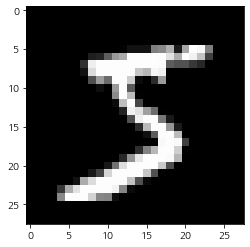

In [4]:
import matplotlib.pyplot as plt

XX = (mnist.data.values/255).reshape(len(mnist.data), 28, 28, 1)
pixels = XX[0].reshape(28, 28)

plt.imshow(pixels, cmap='gray')

### 2. 인공 신경망 모형 구성

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 strides=(1,1), padding='Same',
                 activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 strides=(1,1), padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Using TensorFlow backend.


In [6]:
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 strides=(1,1), padding='Same',
                 activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 strides=(1,1), padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0, 25))
model.add(Dense(units=10, activation='softmax'))

### 3. 모형 학습 설정

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

### 4. 모형 학습

In [9]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=100,
          verbose=2)


Epoch 1/10
 - 118s - loss: 0.1977 - accuracy: 0.9378
Epoch 2/10
 - 125s - loss: 0.0479 - accuracy: 0.9853
Epoch 3/10
 - 122s - loss: 0.0320 - accuracy: 0.9897
Epoch 4/10
 - 130s - loss: 0.0253 - accuracy: 0.9915
Epoch 5/10
 - 149s - loss: 0.0195 - accuracy: 0.9934
Epoch 6/10
 - 130s - loss: 0.0153 - accuracy: 0.9950
Epoch 7/10
 - 135s - loss: 0.0131 - accuracy: 0.9956
Epoch 8/10
 - 144s - loss: 0.0106 - accuracy: 0.9967
Epoch 9/10
 - 135s - loss: 0.0084 - accuracy: 0.9972
Epoch 10/10
 - 135s - loss: 0.0090 - accuracy: 0.9968


In [12]:
hist = model.fit(X_train, y_train,
          epochs=10,
          batch_size=100,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 49000 samples, validate on 21000 samples
Epoch 1/10
 - 141s - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0400 - val_accuracy: 0.9910
Epoch 2/10
 - 143s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0406 - val_accuracy: 0.9923
Epoch 3/10
 - 159s - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0429 - val_accuracy: 0.9915
Epoch 4/10
 - 146s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0474 - val_accuracy: 0.9918
Epoch 5/10
 - 122s - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0500 - val_accuracy: 0.9915
Epoch 6/10
 - 126s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0386 - val_accuracy: 0.9912
Epoch 7/10
 - 126s - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0482 - val_accuracy: 0.9914
Epoch 8/10
 - 120s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0450 - val_accuracy: 0.9911
Epoch 9/10
 - 121s - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0727 - val_accuracy: 0.9884
Epoch 10/10
 - 122s - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.0556 - val_accuracy: 0.9911

In [13]:
hist.history['accuracy']

[0.99814284,
 0.9989388,
 0.9983469,
 0.99916327,
 0.9984286,
 0.99820405,
 0.9993469,
 0.9993469,
 0.999,
 0.9983469]

In [14]:
hist.history['loss']

[0.005349045957781091,
 0.0036090850588647305,
 0.005065664269721064,
 0.002448005049827005,
 0.004996163651273265,
 0.00559868292385317,
 0.0019121432793290714,
 0.002412763080913482,
 0.002746080806990247,
 0.0045418945913395315]

### 5. 모형 성능 평가

In [15]:
loss, acc = model.evaluate(X_test, y_test)

21000/21000 [==============================] - 10s 487us/step


In [16]:
print('손실값:', round(loss, 3))
print('정확도:', round(acc, 3))

손실값: 0.056
정확도: 0.991


### 6. 임의의 데이터- 모형 출력 확인

In [17]:
y_pred = model.predict(X_test)
print(y_pred[0:3])

[[3.3007530e-10 1.6053943e-21 2.2508612e-22 2.0270688e-24 1.2968462e-17
  9.9883891e-07 9.9999905e-01 6.8372888e-18 4.1579479e-14 5.7766708e-18]
 [6.1978045e-09 3.3352475e-17 1.0000000e+00 1.1431502e-10 8.6200197e-22
  1.6387594e-13 5.5982271e-23 4.1321726e-13 7.2393602e-10 3.7980796e-15]
 [4.3988215e-26 5.1297690e-20 1.5700178e-17 2.2973582e-16 1.6362341e-15
  6.2587392e-26 1.5315467e-28 1.0000000e+00 2.5916148e-24 1.4871216e-16]]


In [18]:
y_pred_class = model.predict_classes(X_test)
print(y_pred_class[0:3])

[6 2 7]


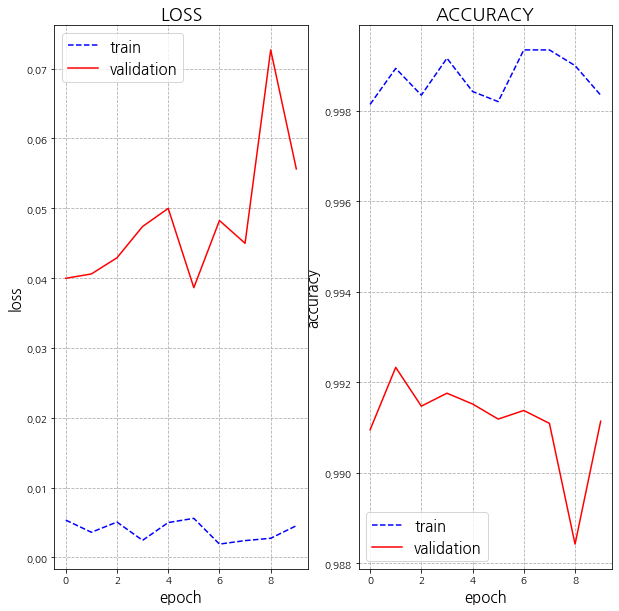

In [19]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], color='blue', linestyle='--', label='train')
plt.plot(hist.history['val_loss'], color='red', label='validation')
plt.xlabel('epoch', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.title('LOSS', fontsize=18)
plt.grid(linestyle='--')
plt.legend(fontsize=15, loc='best')

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], color='blue', linestyle='--', label='train')
plt.plot(hist.history['val_accuracy'], color='red', label='validation')
plt.xlabel('epoch', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.title('ACCURACY', fontsize=18)
plt.grid(linestyle='--')
plt.legend(fontsize=15, loc='best')